<a href="https://colab.research.google.com/github/bipinKrishnan/fastai_course/blob/master/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import models
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from tqdm.notebook import tqdm

In [2]:
path = '/content/bear/'
transform = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor()
])

In [ ]:
!rm -r $path/.ipynb_checkpoints

In [4]:
def load_dataset(path=path, bs=1, transform=transform, train=True):
  imgs = ImageFolder(root=path, transform=transform)
  load_dataset.target = imgs.classes

  dataloader = DataLoader(imgs, bs, shuffle=train)

  return dataloader

def show_batch(dataloader, rows, cols):
  
  for i, (img, label) in enumerate(dataloader):
    plt.subplot(rows, cols, i+1)
    plt.imshow(np.squeeze(np.transpose(img[0].numpy(), (1, 2, 0))))
    plt.title(load_dataset.target[label[0].item()])
    plt.xticks([])
    plt.yticks([])

    if i+1 >= (rows*cols):
      break

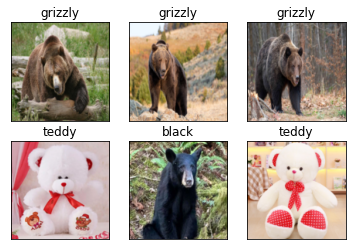

In [5]:
trainloader = load_dataset()
show_batch(trainloader, 2, 3)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = models.resnet18(pretrained=True)

In [7]:
for params in model.parameters():
  params.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 3)
model = model.to(device)

In [8]:
criterion = torch.nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
#opt = optim.Adam(model.parameters(), lr=1e-3)

In [9]:
epochs = 50

model.train()
for epoch in tqdm(range(epochs), total=epochs):
  for img, label in trainloader:
    img, label = img.to(device), label.to(device)
    opt.zero_grad()

    out = model(img)

    loss = criterion(out, label)

    loss.backward()

    opt.step()
  
  if epoch >= epochs-10:
    print("Epoch: {}  Loss: {}".format(epoch+1, loss.item()))

Epoch: 41  Loss: 1.5055999755859375
Epoch: 42  Loss: 0.597385585308075
Epoch: 43  Loss: 0.8852128386497498
Epoch: 44  Loss: 0.7024945616722107
Epoch: 45  Loss: 1.8038150072097778
Epoch: 46  Loss: 1.0597186088562012
Epoch: 47  Loss: 0.44342052936553955
Epoch: 48  Loss: 0.5551447868347168
Epoch: 49  Loss: 1.2215511798858643
Epoch: 50  Loss: 1.3300931453704834



In [17]:
def model_predict(img_path):
  transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    ])
  
  test_img = Image.open(img_path)
  test_img = transform(test_img).to(device)

  model_predict.prob = model(test_img.unsqueeze(0))
  
  return load_dataset.target[torch.max(model_predict.prob, 1)[1].item()]

In [18]:
teddy1 = '/content/test_imgs/ted.jpg'
teddy = '/content/test_imgs/4-feet-stuffed-spongy-huggable-smartoys-cute-soft-red-teddy-bear-original-imaf9gaa77frnzag.webp'
black = '/content/test_imgs/blackbear2020ILCPOCaptLaura_Petreikis2__2_.0.webp'
black1 = '/content/test_imgs/black-bear-with-5-cubs.webp'
grizzly = '/content/test_imgs/grizzly1.jpg'
grizzly1 = '/content/test_imgs/grizzly1.jpg'

test_set = [black, black1, grizzly, grizzly1, teddy, teddy1]

for img in test_set:
  print(model_predict(img), model_predict.prob)

teddy tensor([[-0.3874, -0.1994, -0.0520]], device='cuda:0', grad_fn=<AddmmBackward>)
grizzly tensor([[-0.3817, -0.0964, -0.2246]], device='cuda:0', grad_fn=<AddmmBackward>)
grizzly tensor([[-0.3397, -0.1151, -0.1568]], device='cuda:0', grad_fn=<AddmmBackward>)
grizzly tensor([[-0.3397, -0.1151, -0.1568]], device='cuda:0', grad_fn=<AddmmBackward>)
teddy tensor([[-0.4676, -0.1770, -0.1034]], device='cuda:0', grad_fn=<AddmmBackward>)
teddy tensor([[-0.3422, -0.2232, -0.0990]], device='cuda:0', grad_fn=<AddmmBackward>)
